Enter the initial value for 'x' for integration: 0
Enter the end value for 'x' for integration: 3
Enter the number for splits along the domain: 50
Value for approximated integration from rectangles is :  0.898
Value for approximated integration from trapezoids is :  0.868


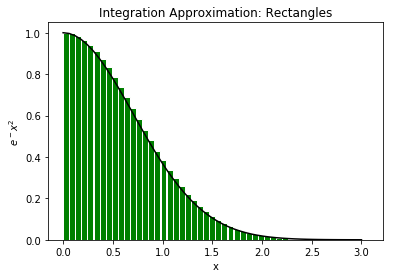

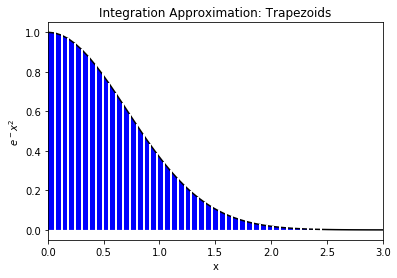

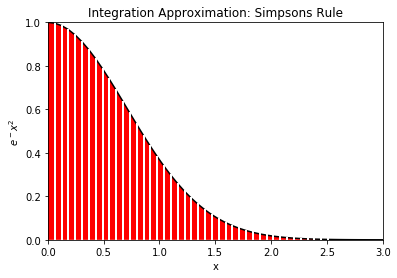

Value for Simpson's rule approximation is :  0.908


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def Rectangles( x_initial , x_final , n):
    #Function to estimate the area under a curve using the area of a series of rectangles
    #passed parameters for initial and final values of 'x' and n number of splits
    
        f = lambda x: np.exp(-(x*x))
        delta_x = (x_final - x_initial)/n
        x_values = np.linspace(x_initial , x_final , n)
        y_values = f(x_values)
        area = np.empty( [ n ] , float )
        total_area = 0
        for i in range( n ):
            area[ i ] = y_values[ i ] * delta_x
            total_area = area[ i ] + total_area
        plt.figure()
        plt.plot( x_values, y_values , 'black')
        plt.bar( x_values + delta_x/2 , y_values , delta_x , color = 'green' , edgecolor = 'white' )
        plt.xlabel('x')
        plt.ylabel('$e^-x^2$')
        plt.title('Integration Approximation: Rectangles')
        return total_area

def Trapezoids( x_initial , x_final , n):
    #Function to estimate the area under the curve using the area of a series of trapezoids
    #passed parameters for initial and final values of 'x' and n number of splits
    
        f = lambda x: np.exp(-(x*x))
        x_values = np.linspace(x_initial , x_final , n)
        y_values = f(x_values)
        delta_x = (x_final - x_initial)/n
        area = np.empty( [ n ] , float )
        total_area = 0
        for i in range( n ):
            if( i==0 ):
                area[ i ] = 0
            else:
                area[ i ] = (y_values[i] * delta_x) + (1/2) * (y_values[ i-1 ] - y_values[ i ]) * delta_x
                total_area = area[ i ] + total_area
        
        plt.figure()
        plt.plot( x_values , y_values , 'black')
        plt.xlim( x_initial , x_final )
        y2 = np.array([0,0])
        for i in range( n-1 ):
            x0 = x_values[i:i+2]
            y1 = y_values[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [x_values[i+1], x_values[i+1]], [0, y_values[i+1]] 
            plt.plot(linex, liney, color='white', linewidth=2.0)        
        
        plt.xlabel('x')
        plt.ylabel('$e^-x^2$')
        plt.title('Integration Approximation: Trapezoids')
        return total_area
        

        
def Simpson( x_initial , x_final , n):
    #Function to estimate the area under the curve using the Simpson's approximation method
    #passed parameters for initial and final values of 'x' and n number of splits
   
        f = lambda x: np.exp(-(x*x))
        x_values = np.linspace(x_initial , x_final , n)
        y_values = f(x_values)
        delta_x = (x_final - x_initial)/n
        area = np.empty( [ n ] , float )
        total_area = 0
        for i in range( n ):
            if( i==0 or i==n ):
                area[ i ] = y_values[i] * delta_x * (1/3)
                total_area = area[ i ] + total_area
            if( i%2 == 1): 
                area[ i ] = delta_x * (4/3) * y_values[ i ]
                total_area = area[ i ] + total_area
            else:
                area[ i ] = delta_x * (2/3) * y_values[ i ]
                total_area = area[ i ] + total_area
        
        plt.figure()
        plt.plot( x_values , y_values , 'black')
        plt.xlim( x_initial , x_final )
        plt.ylim( f(x_final) , f(x_initial) )
        y2 = np.array([0,0])
        for i in range( n-1 ):
            x0 = x_values[i:i+2]
            y1 = y_values[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='red')
            linex, liney = [x_values[i+1], x_values[i+1]], [0, y_values[i+1]] 
            plt.plot(linex, liney, color='white', linewidth=2.0)        
        plt.xlabel('x')
        plt.ylabel('$e^-x^2$')
        plt.title('Integration Approximation: Simpsons Rule')
        plt.show()
        return total_area
                
        
        
        
        
x_initial = int(input("Enter the initial value for 'x' for integration: "))
x_final =  int(input("Enter the end value for 'x' for integration: "))
n = int(input("Enter the number for splits along the domain: "))

print("Value for approximated integration from rectangles is : " , "{0:.3f}".format(Rectangles(x_initial,x_final,n)))
print("Value for approximated integration from trapezoids is : " , "{0:.3f}".format(Trapezoids(x_initial,x_final,n)))
print("Value for Simpson's rule approximation is : " , "{0:.3f}".format(Simpson(x_initial,x_final,n)))